## Project - Personal Loan Campaign Modelling

### Import the necessary packages


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

%matplotlib inline

### Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.

In [3]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
print('Number of rows %d and number of columns %d' % data.shape)

Number of rows 5000 and number of columns 14


In [4]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Number of unique in each column

In [7]:
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

### Check for null values

In [8]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [11]:
data_x = data.drop(columns=['ZIP Code','Personal Loan','ID'], axis=1)
data_x=pd.get_dummies(data_x, columns=['Education'])

In [12]:
data_x.loc[data_x.Experience < 0, 'Experience'] = 0
data_x.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.119600,11.440484,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0
CreditCard,5000.0,0.294000,0.455637,0.0,0.0,0.0,1.0,1.0


### Number of people with zero mortgage

In [13]:
mortgage = data['Mortgage'].apply(lambda x: x == 0)
mortgage_data = data[mortgage]
print('Number of people with 0 Mortgage %d' % mortgage_data.shape[0])

Number of people with 0 Mortgage 3462


### Number of people with zero credit card spending per month

In [14]:
avg_cc = data['CCAvg'].apply(lambda x: x == 0.0)
average_cc = data[avg_cc]
print('Number of people with $0 credit card spending per month %d' % average_cc.shape[0])

Number of people with $0 credit card spending per month 106


### Value counts of all categorical columns

In [15]:
data[['Education','Securities Account','CD Account','Online', 'CreditCard']].value_counts().transpose()

Education  Securities Account  CD Account  Online  CreditCard
1          0                   0           1       0             750
3          0                   0           1       0             562
1          0                   0           0       0             551
2          0                   0           1       0             542
3          0                   0           0       0             395
2          0                   0           0       0             338
1          0                   0           1       1             313
                                           0       1             207
3          0                   0           1       1             173
2          0                   0           1       1             172
3          0                   0           0       1             169
2          0                   0           0       1             151
1          1                   0           1       0              81
2          1                   0         

### Univariate and Bivariate

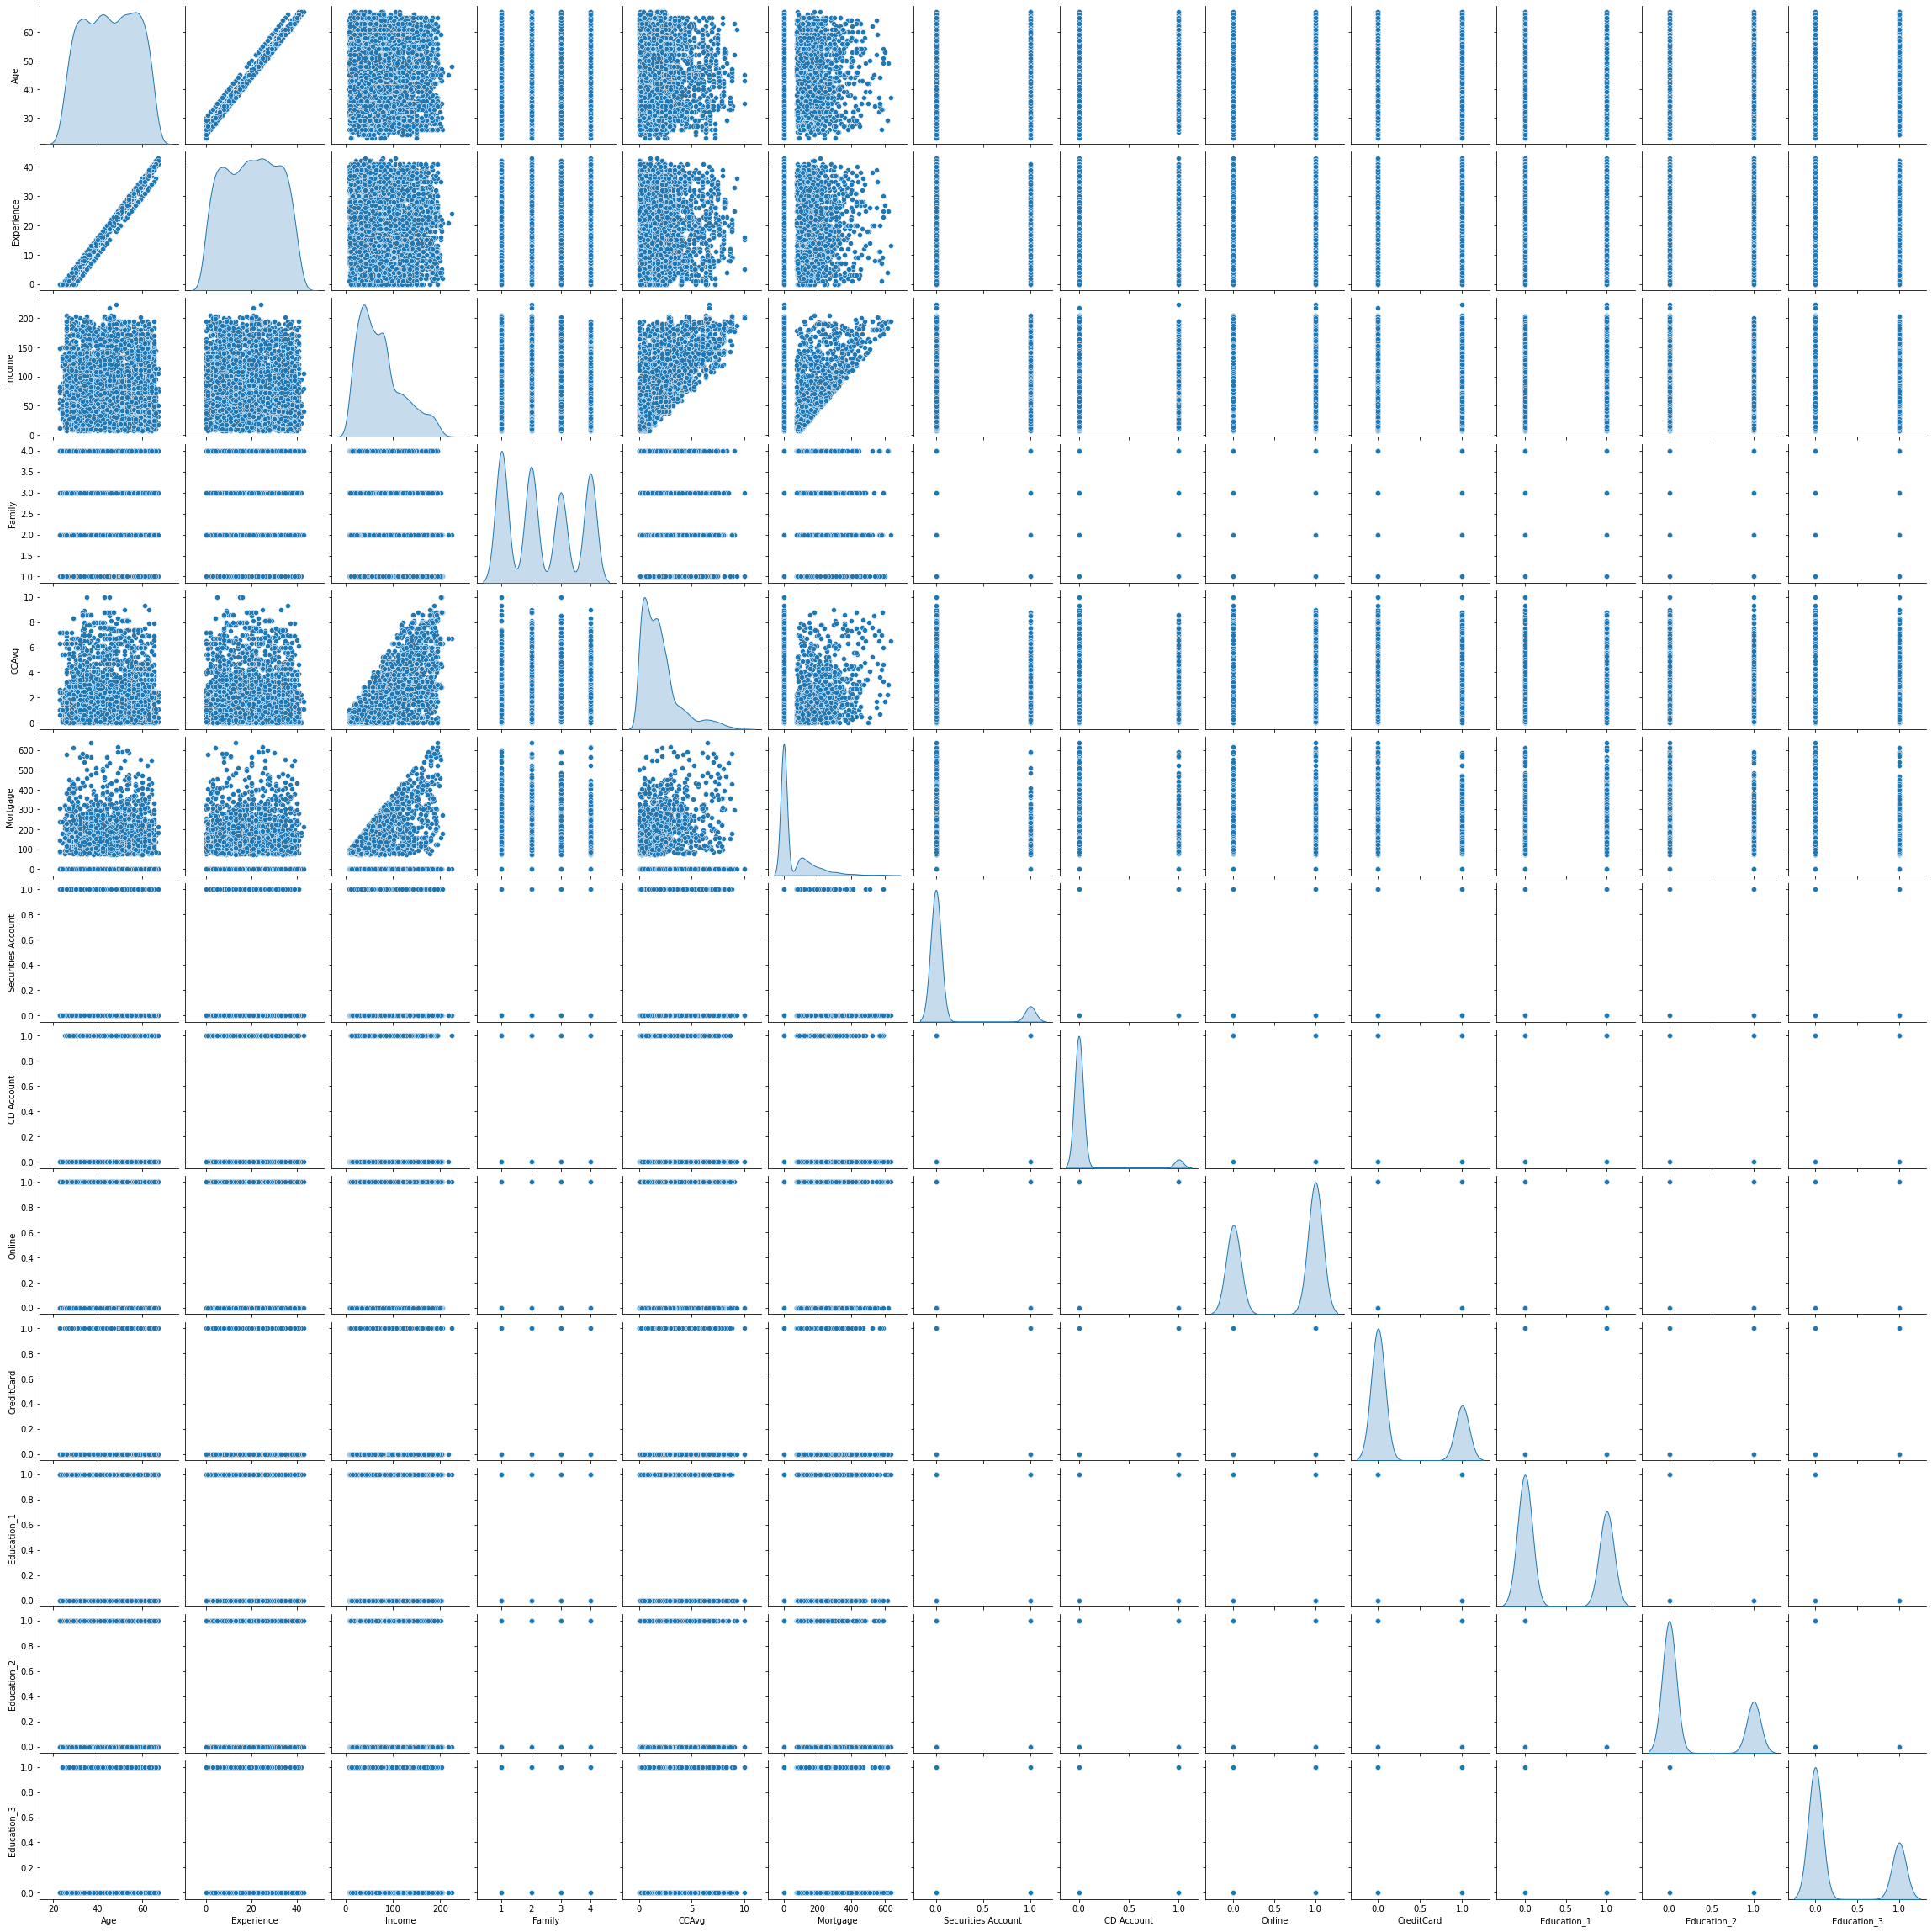

In [16]:
sns.pairplot(data_x, diag_kind='kde')

In [17]:
data=pd.get_dummies(data, columns=['Education'])

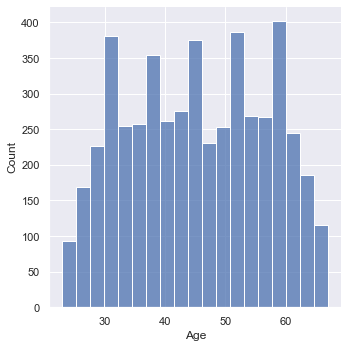

In [18]:
sns.set(rc={"figure.figsize": (8, 4)})
sns.displot(data['Age'],kde=False)
plt.show()

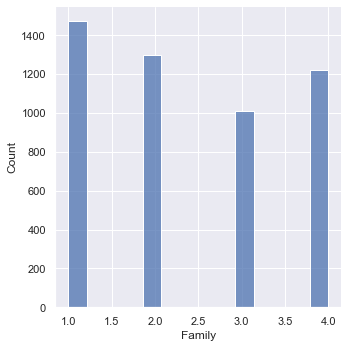

In [19]:
sns.set(rc={"figure.figsize": (8, 4)})
sns.displot(data['Family'],kde=False)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Income'>

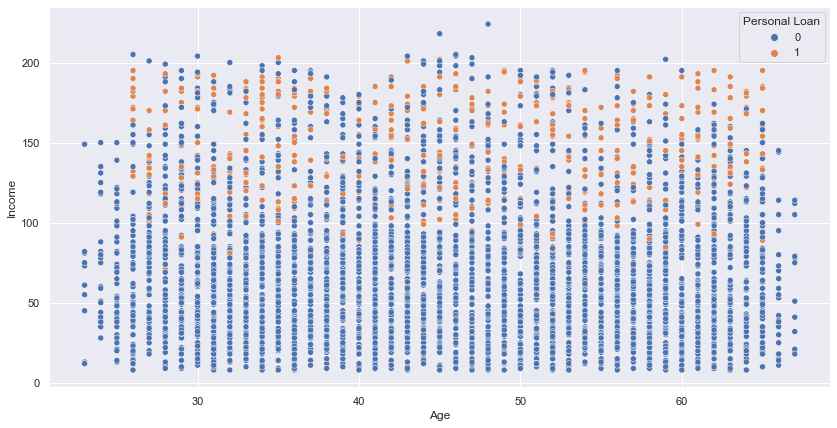

In [20]:
sns.set(rc={"figure.figsize": (14, 7)})
sns.scatterplot(data=data, x="Age", y="Income", hue='Personal Loan')

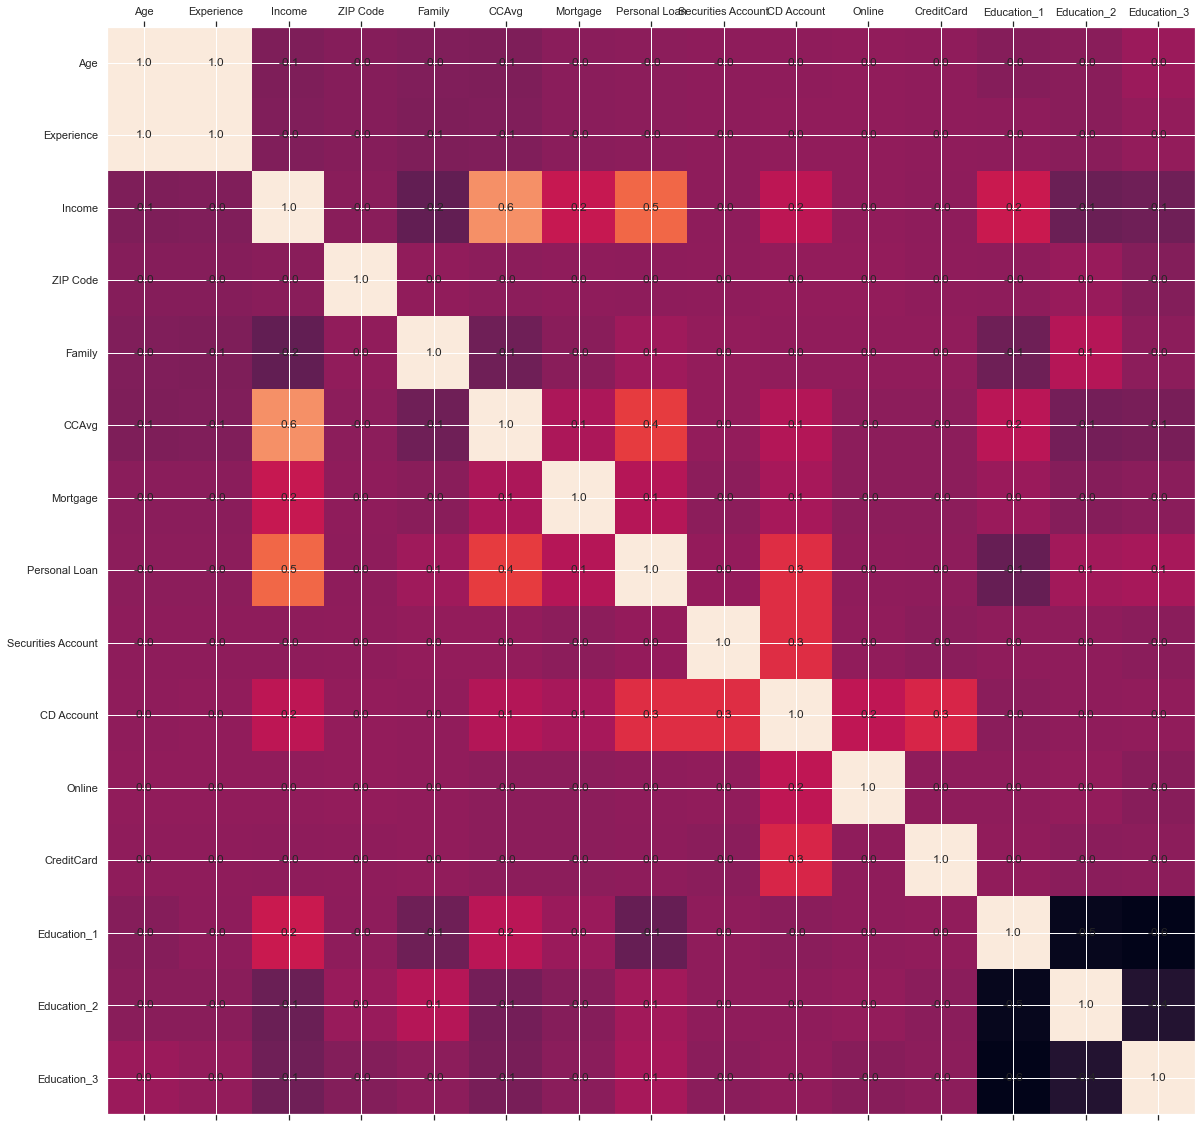

In [21]:
def plot_corr(d, size=17):
    corr = d.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plot_corr(data.drop(columns=['ID'], axis=1), size=20)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Experience'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Family'}>],
       [<AxesSubplot:title={'center':'CCAvg'}>,
        <AxesSubplot:title={'center':'Mortgage'}>],
       [<AxesSubplot:title={'center':'Securities Account'}>,
        <AxesSubplot:title={'center':'CD Account'}>],
       [<AxesSubplot:title={'center':'Online'}>,
        <AxesSubplot:title={'center':'CreditCard'}>],
       [<AxesSubplot:title={'center':'Education_1'}>,
        <AxesSubplot:title={'center':'Education_2'}>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

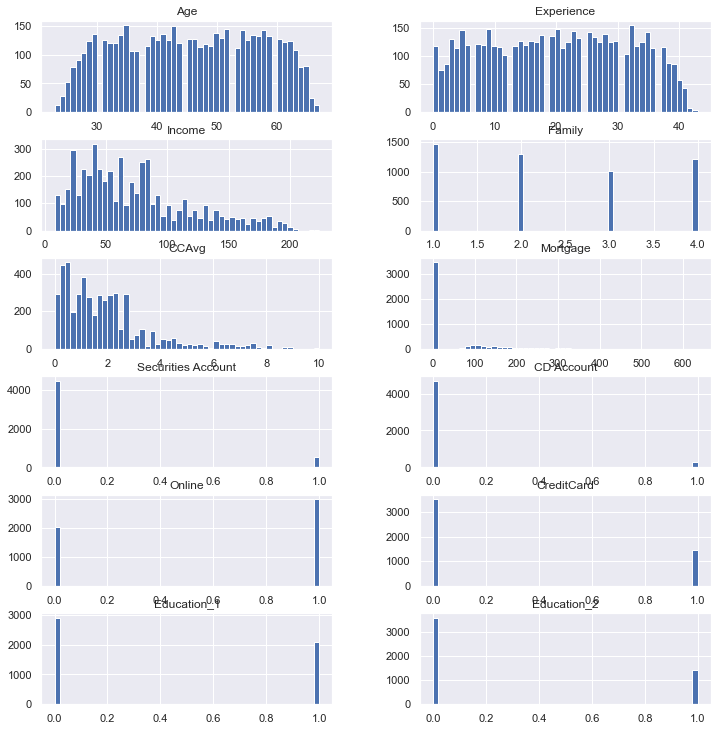

In [22]:
columns = list(data_x)[0:-1]
data_x[columns].hist(stacked=False, bins=50, figsize=(12,30), layout=(14,2))

### Preparing the data

In [23]:
Y = data['Personal Loan']
X = data.drop(columns=['Personal Loan','ZIP Code', 'ID'],axis=1)
model_features = ['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard']

### Updating CC Avg and Income columns with mean value for 0

In [24]:
from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols=['CCAvg','Income']
imputer = rep_0.fit(X[cols])
X[cols] = imputer.transform(X[cols])

### Splitting the data into Training set and Testing set

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
x_train.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
1334,47,22,35.0,2,1.3,0,0,0,1,0,1,0,0
4768,38,14,39.0,1,2.0,0,0,0,1,0,0,1,0
65,59,35,131.0,1,3.8,0,0,0,1,1,1,0,0
177,29,3,65.0,4,1.8,244,0,0,0,0,0,1,0
4489,39,13,21.0,3,0.2,0,0,0,1,0,0,1,0


In [26]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(data.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [27]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(data.loc[data['Personal Loan'] == 1]), (len(data.loc[data['Personal Loan'] == 1])/len(data.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(data.loc[data['Personal Loan'] == 0]), (len(data.loc[data['Personal Loan'] == 0])/len(data.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 331 (9.46%)
Training Personal Loan False Values   : 3169 (90.54%)

Test Personal Loan True Values        : 149 (9.93%)
Test Personal Loan False Values       : 1351 (90.07%)



### Preparing the model

In [28]:
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

model_score = model.score(x_test, y_test)
print('Model score is %.2f' % model_score)

Model score is 0.96


### Confusion Matrix

<AxesSubplot:>

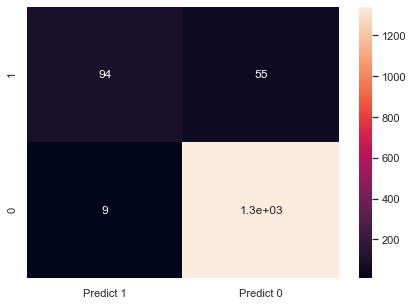

In [29]:
cm = confusion_matrix(y_test, y_predict, labels=[1,0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)


### Accuracy

In [30]:
print('Accuracy score is %.2f' % accuracy_score(y_test, y_predict))

Accuracy score is 0.96


### F1 Score

In [31]:
print('F1 score is %.2f' % f1_score(y_test, y_predict))

F1 score is 0.75


### AUC Score

In [32]:
print('AUC %.2f' % roc_auc_score(y_test, y_predict))

AUC 0.81


### Precision score

In [33]:
print('Precision is %.2f' % precision_score(y_test, y_predict))

Precision is 0.91


### Recall Score

In [34]:
print('Recall is %.2f' % recall_score(y_test, y_predict))

Recall is 0.63


### Coefficients of all the attributes in the model

In [35]:
coef_dict = dict()
for coef, feat in zip(model.coef_[0,:],model_features):
    if feat not in coef_dict:
        coef_dict[feat] = list()
    coef_dict[feat].append(coef) 
pd.DataFrame.from_dict(coef_dict, orient='index')

,0
Age,-0.305047
Experience,0.304997
Income,0.054316
Family,0.585654
CCAvg,0.188624
Education,0.000929
Mortgage,-0.844251
Securities Account,3.151867
CD Account,-0.578775
Online,-0.861099


### All the rows for test data where the predicted class is not equal to the observed class

In [36]:
x_df = pd.DataFrame(y_test,columns = ['Personal Loan'])
x_df.index.name = 'ID'
index_lst = list()
count = 0
for index, row in x_df.iterrows(): 
    if y_predict[count] != row["Personal Loan"]:
        index_lst.append(index)
    count += 1       

incorrect_df = data.apply(lambda x: int(x['ID']) in index_lst, axis = 1)
data_filtered = data[incorrect_df]
data_filtered.head(25)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
321,322,44,20,101,92717,3,4.4,82,1,0,0,0,0,0,1,0
323,324,59,34,99,90034,1,4.4,0,1,0,0,0,0,1,0,0
348,349,40,15,173,95060,4,6.6,0,1,0,1,1,1,1,0,0
463,464,48,22,149,94928,2,5.5,0,1,1,1,1,0,0,1,0
649,650,25,-1,82,92677,4,2.1,0,0,0,0,1,0,0,0,1
784,785,48,22,98,94115,2,6.3,0,0,0,0,0,0,1,0,0
812,813,36,10,65,90089,4,2.2,0,0,0,0,0,0,0,1,0
890,891,55,29,29,92780,4,1.5,79,0,0,0,1,0,0,0,1
926,927,33,9,22,93940,4,0.4,103,0,0,0,1,0,0,1,0
931,932,27,3,43,91302,1,1.0,0,0,0,0,1,0,0,0,1


### Conclusion

- There is very strong co-relation between Age and experience
- There is strong co-relation between CCAvg and Income
- Customers with mortgage are less likely to by Personal goal
- Zip code does not seen to affect the criteria for a customer to buy Personal loan
- Likelihood of the customer buying Personal loan depends upon the income of the customer

### All the rows for test data where the predicted class is not equal to the observed class

In [37]:
x_df = pd.DataFrame(y_test,columns = ['Personal Loan'])
x_df.index.name = 'ID'
index_lst = list()
count = 0
for index, row in x_df.iterrows(): 
    if y_predict[count] != row["Personal Loan"]:
        index_lst.append(index)
    count += 1       

incorrect_df = data.apply(lambda x: int(x['ID']) in index_lst, axis = 1)
data_filtered = data[incorrect_df]
data_filtered.head(25)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
321,322,44,20,101,92717,3,4.4,82,1,0,0,0,0,0,1,0
323,324,59,34,99,90034,1,4.4,0,1,0,0,0,0,1,0,0
348,349,40,15,173,95060,4,6.6,0,1,0,1,1,1,1,0,0
463,464,48,22,149,94928,2,5.5,0,1,1,1,1,0,0,1,0
649,650,25,-1,82,92677,4,2.1,0,0,0,0,1,0,0,0,1
784,785,48,22,98,94115,2,6.3,0,0,0,0,0,0,1,0,0
812,813,36,10,65,90089,4,2.2,0,0,0,0,0,0,0,1,0
890,891,55,29,29,92780,4,1.5,79,0,0,0,1,0,0,0,1
926,927,33,9,22,93940,4,0.4,103,0,0,0,1,0,0,1,0
931,932,27,3,43,91302,1,1.0,0,0,0,0,1,0,0,0,1


### Conclusion

- There is very strong co-relation between Age and experience
- There is strong co-relation between CCAvg and Income
- Customers with mortgage are less likely to by Personal goal
- Zip code does not seen to affect the criteria for a customer to buy Personal loan
- Likelihood of the customer buying Personal loan depends upon the income of the customer